In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("ABC Company.xlsx")

In [5]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB
None
            Name            Team  Number Position  Age               Height  \
0  Avery Bradley  Boston Celtics       0       PG   25  2023-02-06 00:00:00   
1    Jae Crowder  Boston Celtics      99       SF   25  2023-06-06 00:00:00   
2   John Holland  Boston Celtics      30       SG   27  2023-05-06 00:00:00   
3    R.J. Hunter  Boston Celtics      28       SG   22  2023-05-06 00:00:00   
4  J

In [8]:
df['height'] = np.random.randint(150, 181, df.shape[0])

# Check for missing values
print(df.isnull().sum())

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
height       0
dtype: int64


In [10]:
team_distribution = df['Team'].value_counts()
team_percentage = (team_distribution / len(df)) * 100

# Display results
print(team_distribution)
print(team_percentage)

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64
Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz               

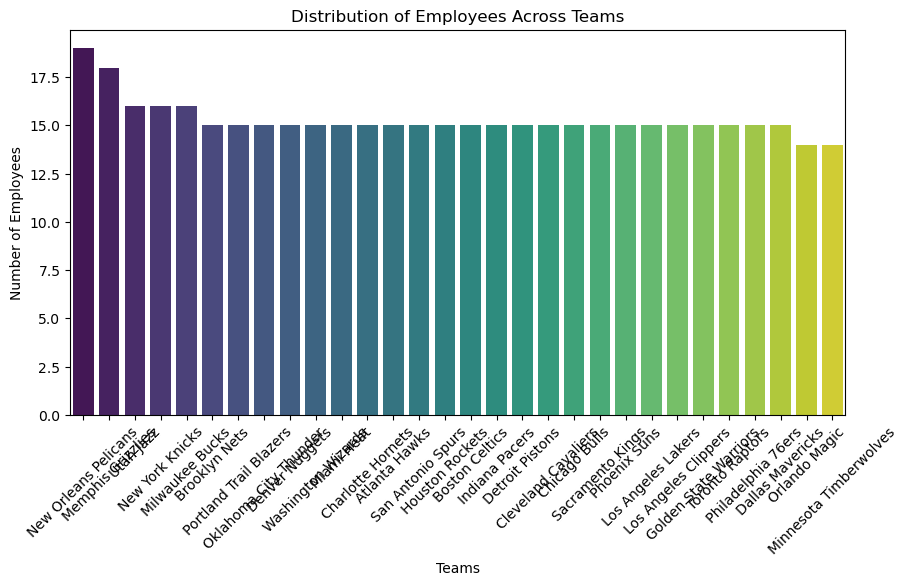

In [12]:
plt.figure(figsize=(10, 5))
sns.barplot(x=team_distribution.index, y=team_distribution.values,hue=team_distribution.index, palette="viridis")
plt.xlabel("Teams")
plt.ylabel("Number of Employees")
plt.title("Distribution of Employees Across Teams")
plt.xticks(rotation=45)
plt.show()

In [14]:
position_distribution = df['Position'].value_counts()

# Display results
print(position_distribution)

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


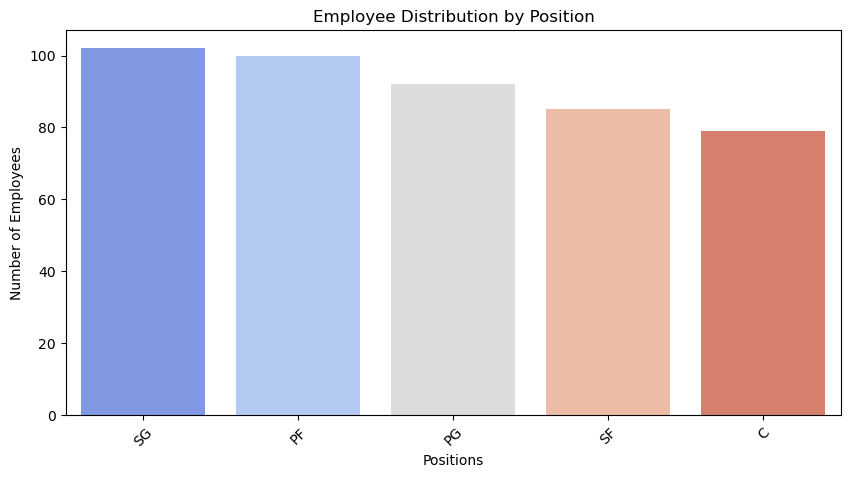

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x=position_distribution.index, y=position_distribution.values, hue= position_distribution.index, palette="coolwarm",legend = False)
plt.xlabel("Positions")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution by Position")
plt.xticks(rotation=45)
plt.show()

In [18]:
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ["18-24", "25-34", "35-44", "45-54", "55-64"]
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

age_distribution = df['age_group'].value_counts()

# Display results
print(age_distribution)

age_group
25-34    235
18-24    200
35-44     23
45-54      0
55-64      0
Name: count, dtype: int64


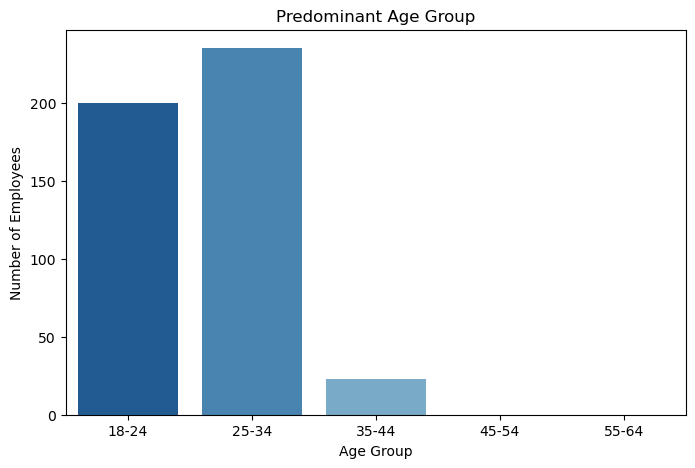

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(x=age_distribution.index, y=age_distribution.values, hue= age_distribution .index,palette="Blues_r",legend=False)
plt.xlabel("Age Group")
plt.ylabel("Number of Employees")
plt.title("Predominant Age Group")
plt.show()

In [22]:
team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

# Display results
print("Team with highest salary expenditure:\n", team_salary.head(1))
print("Position with highest salary expenditure:\n", position_salary.head(1))

Team with highest salary expenditure:
 Team
Cleveland Cavaliers    106988689.0
Name: Salary, dtype: float64
Position with highest salary expenditure:
 Position
C    466377332.0
Name: Salary, dtype: float64


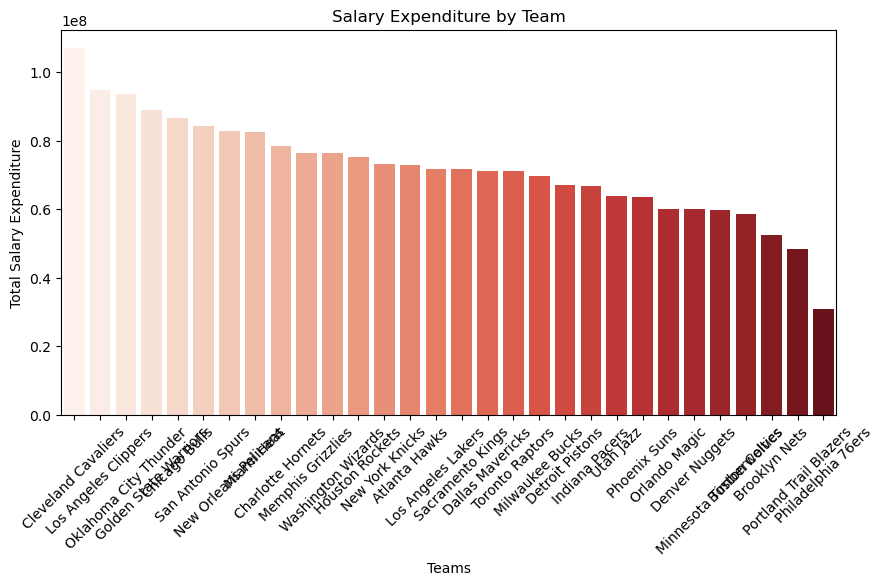

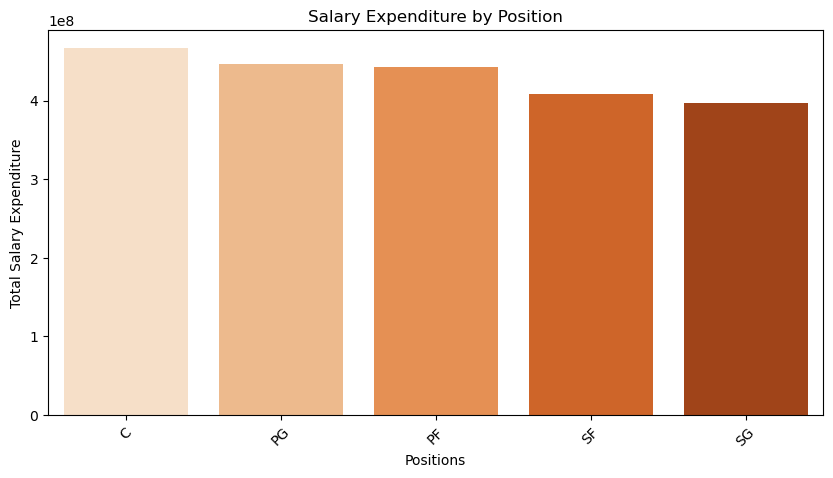

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(x=team_salary.index, y=team_salary.values,hue = team_salary.index, palette="Reds",legend=False)
plt.xlabel("Teams")
plt.ylabel("Total Salary Expenditure")
plt.title("Salary Expenditure by Team")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=position_salary.index, y=position_salary.values,hue = position_salary.index, palette="Oranges",legend=False)
plt.xlabel("Positions")
plt.ylabel("Total Salary Expenditure")
plt.title("Salary Expenditure by Position")
plt.xticks(rotation=45)
plt.show()

In [28]:
correlation = df['Age'].corr(df['Salary'])
print("Correlation between Age and Salary:", correlation)

Correlation between Age and Salary: 0.21400941226570985


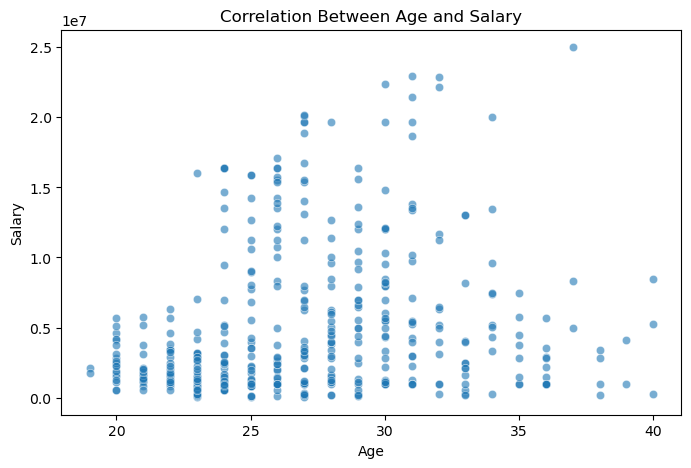

In [30]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Age'], y=df['Salary'], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Correlation Between Age and Salary")
plt.show()

In [ ]:
#Insights from the Analysis

The majority of employees belong to New Orleans Pelicans.

SG AND PF are the most common position in the company.

The predominant age group is 25-34.

The Cleveland Cavaliers team has the highest salary expenditure.

The C position has the highest salary expenditure.

The correlation coefficient of  0.21400941226570985 between age and salary suggests weak positive correlation.